In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# FILE_PATH: Path = Path.cwd().parent / "data" / "Walmart_customer_purchases.csv"
FILE_PATH: Path = Path.cwd().absolute() / "data" / "Walmart_customer_purchases.csv"

In [5]:
df = pd.read_csv(FILE_PATH, sep=",")

In [4]:
df.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   Category          50000 non-null  object 
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   50000 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


,Age,Purchase_Amount,Rating
count,50000.000000,50000.000000,50000.000000
mean,38.945220,255.532230,2.998680
std,12.398137,141.574416,1.417956
min,18.000000,10.010000,1.000000
25%,28.000000,133.050000,2.000000
50%,39.000000,255.045000,3.000000
75%,50.000000,378.912500,4.000000
max,60.000000,499.990000,5.000000


In [ ]:
df.isna().sum()

Customer_ID         0
Age                 0
Gender              0
City                0
Category            0
Product_Name        0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Discount_Applied    0
Rating              0
Repeat_Customer     0
dtype: int64

In [ ]:
df.isnull().any()

Customer_ID         False
Age                 False
Gender              False
City                False
Category            False
Product_Name        False
Purchase_Date       False
Purchase_Amount     False
Payment_Method      False
Discount_Applied    False
Rating              False
Repeat_Customer     False
dtype: bool

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Purchase_Amount'}>, <Axes: >]],
      dtype=object)

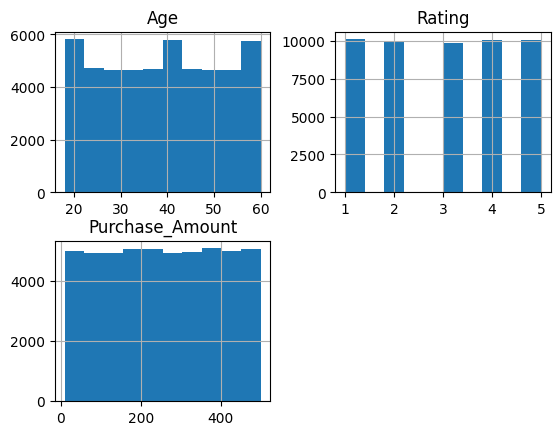

In [ ]:
df[['Age', 'Rating', 'Purchase_Amount']].hist()

In [ ]:
df.describe(include='object')

,Customer_ID,Gender,City,Category,Product_Name,Purchase_Date,Payment_Method,Discount_Applied,Repeat_Customer
count,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,50000,3,25096,4,16,366,4,2,2
top,23e608eb-4b92-4b56-8145-126cd43cd408,Other,New Michael,Electronics,Headphones,2024-04-25,Debit Card,No,Yes
freq,1,16751,44,12642,3261,171,12589,25018,25244


In [ ]:
df['Gender'].unique()

for item in ['Gender', 'Category', 'Product_Name', 'Payment_Method', 'Discount_Applied', "Repeat_Customer"]:
    print(df[item].unique())

['Female' 'Other' 'Male']
['Electronics' 'Clothing' 'Beauty' 'Home']
['Smartphone' 'T-Shirt' 'Perfume' 'Smartwatch' 'Laptop' 'Sofa Cover'
 'Shampoo' 'Cookware' 'Curtains' 'Jeans' 'Headphones' 'Jacket'
 'Face Cream' 'Lipstick' 'Lamp' 'Dress']
['Cash on Delivery' 'Debit Card' 'Credit Card' 'UPI']
['No' 'Yes']
['Yes' 'No']


In [ ]:
df['id'] = df.index + 1
df['id']

id
1            2
2            3
3            4
4            5
5            6
         ...  
49996    49997
49997    49998
49998    49999
49999    50000
50000    50001
Name: id, Length: 50000, dtype: int64

In [ ]:
df.set_index('id', inplace=True)

In [ ]:
df.plot.line(x='id', y='Purchase_Date')
plt.show()

TypeError: no numeric data to plot

In [ ]:
df['Purchase_Date'].head()

id
1    2024-08-30
2    2024-12-21
3    2024-12-26
4    2024-11-04
5    2024-10-07
Name: Purchase_Date, dtype: object

In [ ]:
df['buy_date'] = pd.to_datetime(df['Purchase_Date'])
df['buy_date'].dtype

dtype('<M8[ns]')

In [ ]:
df['buy_date'].describe()
df['buy_date'][df['buy_date'].duplicated()].unique()


<DatetimeArray>
['2024-12-21 00:00:00', '2024-12-26 00:00:00', '2024-03-16 00:00:00',
 '2024-09-27 00:00:00', '2024-06-15 00:00:00', '2024-10-25 00:00:00',
 '2024-04-09 00:00:00', '2024-12-19 00:00:00', '2024-05-21 00:00:00',
 '2024-08-03 00:00:00',
 ...
 '2024-06-12 00:00:00', '2024-09-22 00:00:00', '2024-08-21 00:00:00',
 '2024-09-16 00:00:00', '2024-02-29 00:00:00', '2024-08-23 00:00:00',
 '2024-12-29 00:00:00', '2024-05-18 00:00:00', '2024-10-06 00:00:00',
 '2024-10-31 00:00:00']
Length: 366, dtype: datetime64[ns]

Now checking each individual item on my df to ensure that they have the right spread and dont have outliers or other odd data in it

<Axes: ylabel='Frequency'>

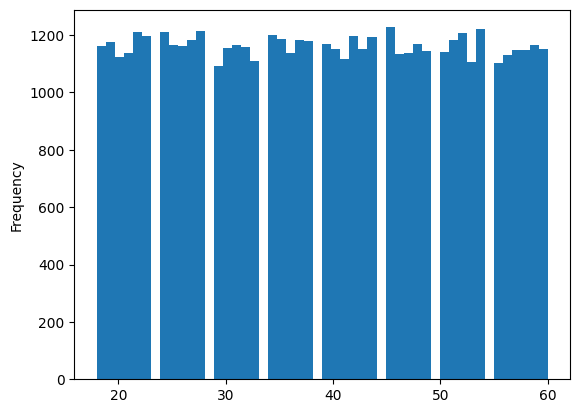

In [ ]:
df['Age'].plot.hist(bins=50)

In [ ]:
# sns.boxplot(x=df['Age'])
for item in df.columns:
    sns.boxplot(x=df[item])

KeyboardInterrupt: 

In [6]:
df['Category'].astype('category').cat.codes

0        2
1        1
2        0
3        2
4        2
        ..
49995    2
49996    0
49997    3
49998    0
49999    0
Length: 50000, dtype: int8